## Code for Fig2c-d

### 実際にネットワークでやってみる

In [107]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import networkx as nx
import random

plt.rcParams['figure.dpi'] = 600
plt.style.use(['nature'])

In [11]:
# Pickle形式で保存
with open(f"/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/co-author_network_2021/revise_0111/coauthorship/only_co_author_network_G_revise_2016-2021.pkl", "rb") as f:
    G = pickle.load(f)

In [26]:
# Pickle形式で保存
with open(f"/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/co-author_network_2021/revise_0111/coauthorship/only_co_author_network_G_revise_before2015.pkl", "rb") as f:
    G1 = pickle.load(f)

In [12]:
authid_12 = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/2021/A1.2_who_guideline_development_group.npy')
authid_13 = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/A1.3_who_systematic_review_team_revise.npy')
authid_14 = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/2021/A1.4_who_external_methodologists.npy')
authid_15 = np.load('//disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/A1.5_who_external_review_team_revise.npy')


boardmember_authid = list(authid_12)+list(authid_13)+list(authid_14)+list(authid_15)

In [61]:
# 3. 各ノードにランダムに役職を割り当てる
for node in G1.nodes():
    if node in authid_12:
        G1.nodes[node]['role'] = 'guideline development group'
    elif node in authid_13:
        G1.nodes[node]['role'] = 'systematic review team'
    elif node in authid_14:
        G1.nodes[node]['role'] = 'external methodologists'
    elif node in authid_15:
        G1.nodes[node]['role'] = 'external review group'

In [62]:
# 4. アソート性係数の計算
#    NetworkXには、ノード属性に基づくアソート性を計算する関数が用意されている
assort_coeff = nx.attribute_assortativity_coefficient(G1, 'role')
print("Categorical Assortativity Coefficient (by 'role'):", assort_coeff)

# 5. 混合行列(mixing matrix)の取得（辞書形式）
mix_dict = nx.attribute_mixing_dict(G1, 'role')
print("Mixing Dict (role vs. role):", mix_dict)

Categorical Assortativity Coefficient (by 'role'): 0.028409238861547267
Mixing Dict (role vs. role): {'external review group': {'guideline development group': 136, 'external review group': 178, 'systematic review team': 26}, 'guideline development group': {'guideline development group': 84, 'external review group': 136, 'systematic review team': 13, 'external methodologists': 1}, 'systematic review team': {'external review group': 26, 'guideline development group': 13, 'systematic review team': 22}, 'external methodologists': {'guideline development group': 1}}


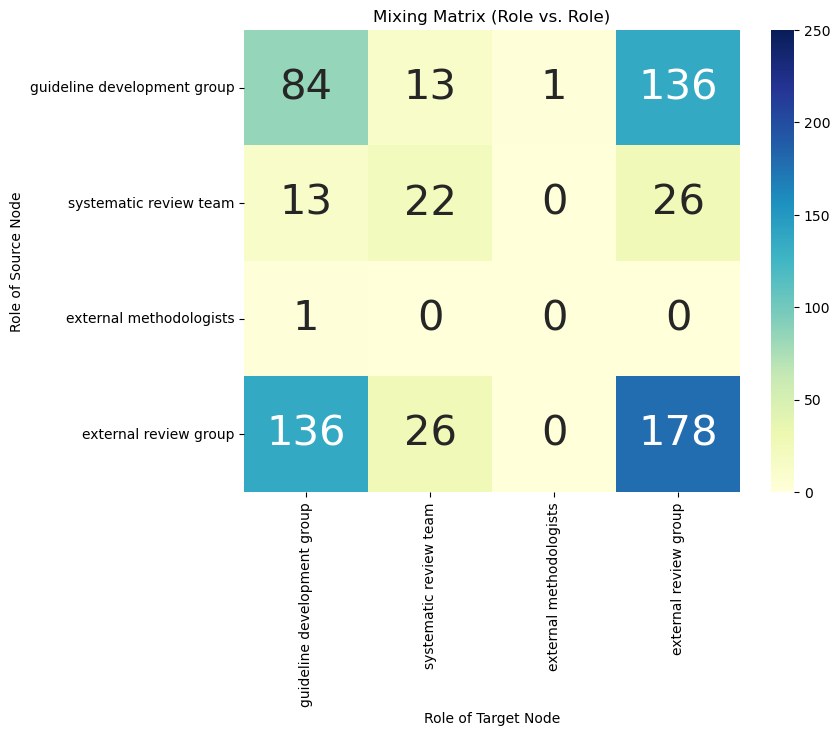

In [63]:
roles = ['guideline development group', 'systematic review team', 'external methodologists', 'external review group']


# 5. 混合行列をpandas DataFrameに変換
#    mix_dictは {role1: {role1: count, role2: count, ...}, role2: {...}, ...} の形式になっている
df_mix = pd.DataFrame(mix_dict).fillna(0)
# 行と列の順序をrolesリストに合わせる
df_mix = df_mix.reindex(index=roles, columns=roles)

# 6. ヒートマップの描画
plt.figure(figsize=(8, 6))
sns.heatmap(df_mix,
            annot=True, 
            fmt="g", 
            cmap="YlGnBu",
            annot_kws={"size": 30},         # セル内文字のサイズを16に設定
            vmin=0, vmax=250,               # カラーバーの範囲を0～100に指定
            cbar_kws={'ticks': [0, 50, 100, 150, 200,250]}  # カラーバーの目盛り位置を指定
           )
plt.title("Mixing Matrix (Role vs. Role)")
plt.xlabel("Role of Target Node")
plt.ylabel("Role of Source Node")
plt.show()


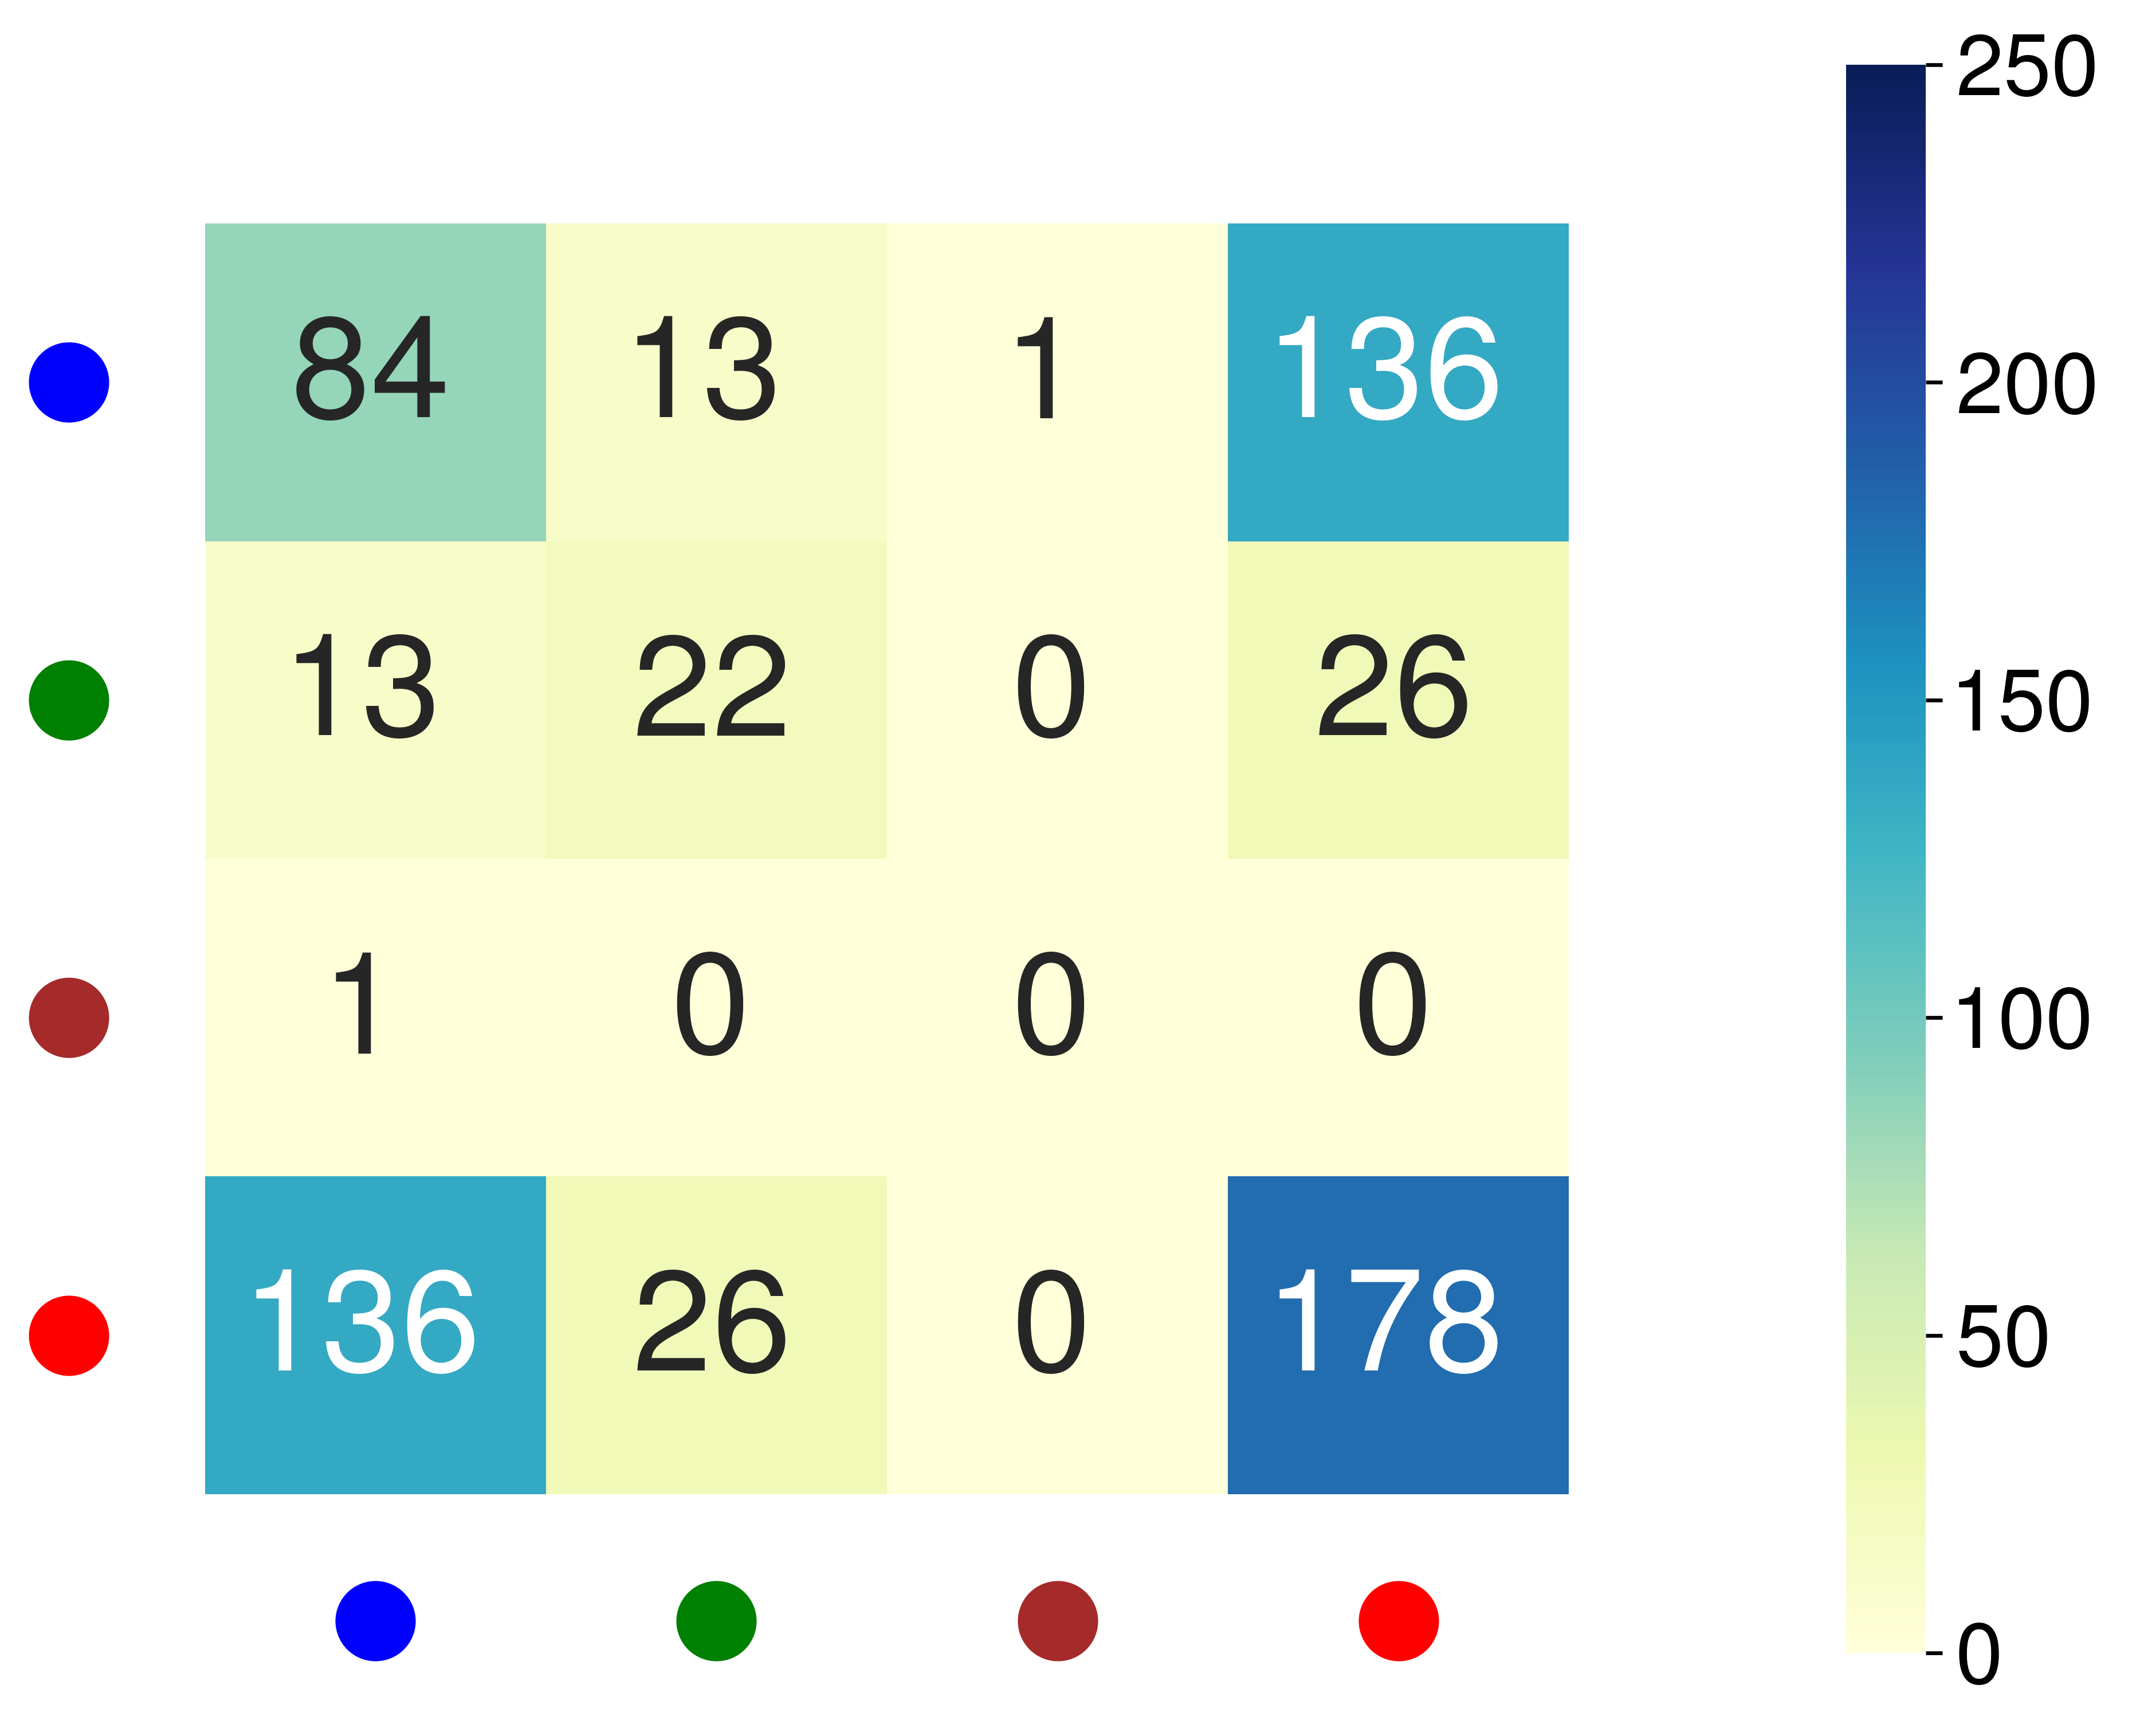

In [89]:
roles = ['guideline development group', 'systematic review team', 'external methodologists', 'external review group']


# 5. 混合行列をpandas DataFrameに変換
#    mix_dictは {role1: {role1: count, role2: count, ...}, role2: {...}, ...} の形式になっている
df_mix = pd.DataFrame(mix_dict).fillna(0)
# 行と列の順序をrolesリストに合わせる
df_mix = df_mix.reindex(index=roles, columns=roles)

# 6. ヒートマップの描画
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_mix,
            annot=True, 
            fmt="g", 
            cmap="YlGnBu",
            annot_kws={"size": 30},         # セル内文字のサイズを16に設定
            vmin=0, vmax=250,               # カラーバーの範囲を0～100に指定
            cbar_kws={'ticks': [0, 50, 100, 150, 200,250]}  # カラーバーの目盛り位置を指定
           )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # ここでフォントサイズを変更（例: 18ポイント）
# mathtext を使って、色付きの丸を定義
# 軸のラベルを消す（デフォルトのラベルを非表示）
ax.set_xticklabels([""] * 4)
ax.set_yticklabels([""] * 4)

# 軸の位置を取得（各セルの中心にマーカーを配置）
xticks = np.arange(4) + 0.5  # x 軸のラベル位置
yticks = np.arange(4) + 0.5  # y 軸のラベル位置

# ラベルに表示する丸の色（4×4に対応）
colors = ["blue", "green", "brown", "red"]  # 4つのラベル用

# x 軸の丸を描画
for x, color in zip(xticks, colors):
    ax.scatter(x, 4.4, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# y 軸の丸を描画
for y, color in zip(yticks, colors):
    ax.scatter(-0.4, y, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# **軸の線（スパイン）を削除**
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# 軸の目盛り線（グリッド線）が被らないように削除
ax.tick_params(left=False, bottom=False)

# 軸の範囲を調整（丸が見切れないように）
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(4.5, -0.5)

plt.show()


In [58]:
# 3. 各ノードにランダムに役職を割り当てる
for node in G.nodes():
    if node in authid_12:
        G.nodes[node]['role'] = 'guideline development group'
    elif node in authid_13:
        G.nodes[node]['role'] = 'systematic review team'
    elif node in authid_14:
        G.nodes[node]['role'] = 'external methodologists'
    elif node in authid_15:
        G.nodes[node]['role'] = 'external review group'

In [59]:
# 4. アソート性係数の計算
#    NetworkXには、ノード属性に基づくアソート性を計算する関数が用意されている
assort_coeff = nx.attribute_assortativity_coefficient(G, 'role')
print("Categorical Assortativity Coefficient (by 'role'):", assort_coeff)

# 5. 混合行列(mixing matrix)の取得（辞書形式）
mix_dict1 = nx.attribute_mixing_dict(G, 'role')
print("Mixing Dict (role vs. role):", mix_dict)

Categorical Assortativity Coefficient (by 'role'): 0.10053887011105761
Mixing Dict (role vs. role): {'external review group': {'external review group': 224, 'guideline development group': 191, 'systematic review team': 33, 'external methodologists': 8}, 'systematic review team': {'systematic review team': 68, 'external review group': 33, 'guideline development group': 19}, 'guideline development group': {'external review group': 191, 'guideline development group': 126, 'systematic review team': 19, 'external methodologists': 1}, 'external methodologists': {'external review group': 8, 'external methodologists': 2, 'guideline development group': 1}}


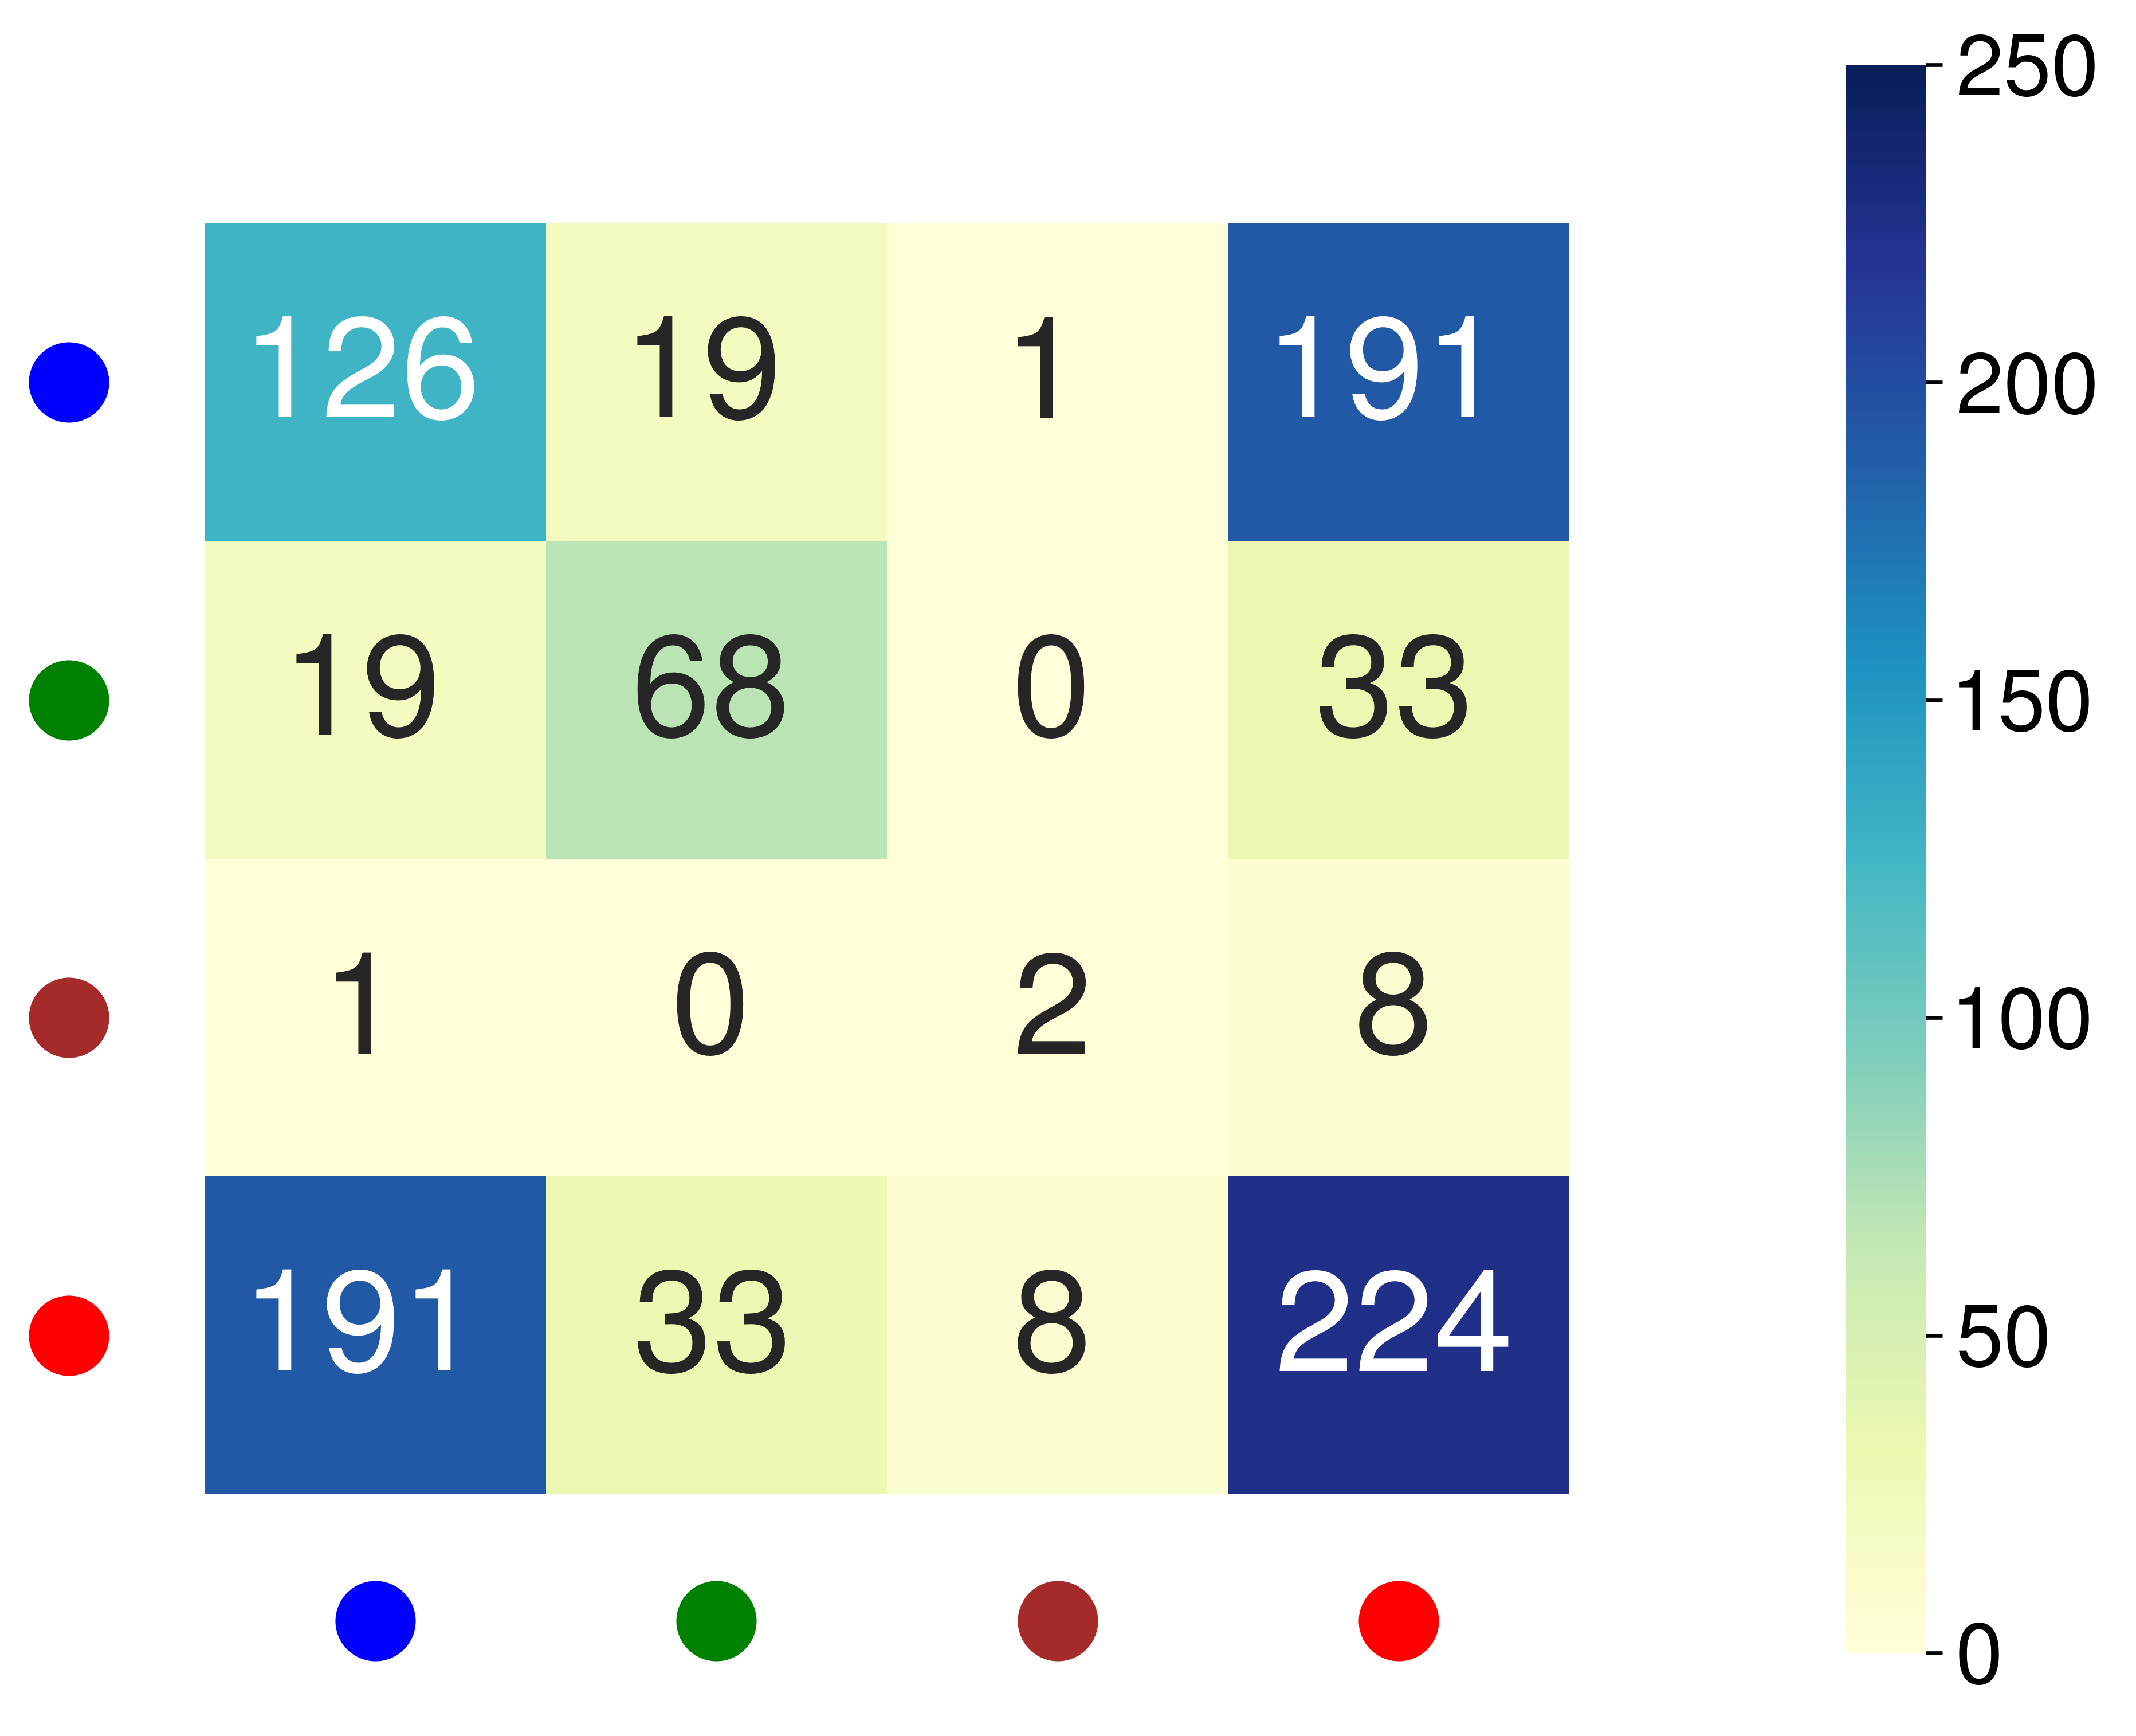

In [88]:
roles = ['guideline development group', 'systematic review team', 'external methodologists', 'external review group']


# 5. 混合行列をpandas DataFrameに変換
#    mix_dictは {role1: {role1: count, role2: count, ...}, role2: {...}, ...} の形式になっている
df_mix1 = pd.DataFrame(mix_dict1).fillna(0)
# 行と列の順序をrolesリストに合わせる
df_mix1 = df_mix1.reindex(index=roles, columns=roles)

# 6. ヒートマップの描画
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_mix1,
            annot=True, 
            fmt="g", 
            cmap="YlGnBu",
            annot_kws={"size": 30},         # セル内文字のサイズを16に設定
            vmin=0, vmax=250,               # カラーバーの範囲を0～100に指定
            cbar_kws={'ticks': [0, 50, 100, 150, 200,250]}  # カラーバーの目盛り位置を指定
           )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # ここでフォントサイズを変更（例: 18ポイント）
# mathtext を使って、色付きの丸を定義
# 軸のラベルを消す（デフォルトのラベルを非表示）
ax.set_xticklabels([""] * 4)
ax.set_yticklabels([""] * 4)

# 軸の位置を取得（各セルの中心にマーカーを配置）
xticks = np.arange(4) + 0.5  # x 軸のラベル位置
yticks = np.arange(4) + 0.5  # y 軸のラベル位置

# ラベルに表示する丸の色（4×4に対応）
colors = ["blue", "green", "brown", "red"]  # 4つのラベル用

# x 軸の丸を描画
for x, color in zip(xticks, colors):
    ax.scatter(x, 4.4, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# y 軸の丸を描画
for y, color in zip(yticks, colors):
    ax.scatter(-0.4, y, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# **軸の線（スパイン）を削除**
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# 軸の目盛り線（グリッド線）が被らないように削除
ax.tick_params(left=False, bottom=False)

# 軸の範囲を調整（丸が見切れないように）
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(4.5, -0.5)

plt.show()


In [30]:
assort_coeff

0.028409238861547267

In [111]:
df_mix

,guideline development group,systematic review team,external methodologists,external review group
guideline development group,84,13.0,1.0,136.0
systematic review team,13,22.0,0.0,26.0
external methodologists,1,0.0,0.0,0.0
external review group,136,26.0,0.0,178.0


In [112]:
# 対角線より上の要素を NaN にする
mask = np.triu(np.ones_like(df_mix, dtype=bool), k=1)  # k=1 で対角線を含めない
df_mix = df_mix.astype(float)  # NaN を入れるため float に変換
df_mix[mask] = np.nan

## 描画

Text(0.5, 1.0, '2016-2021')

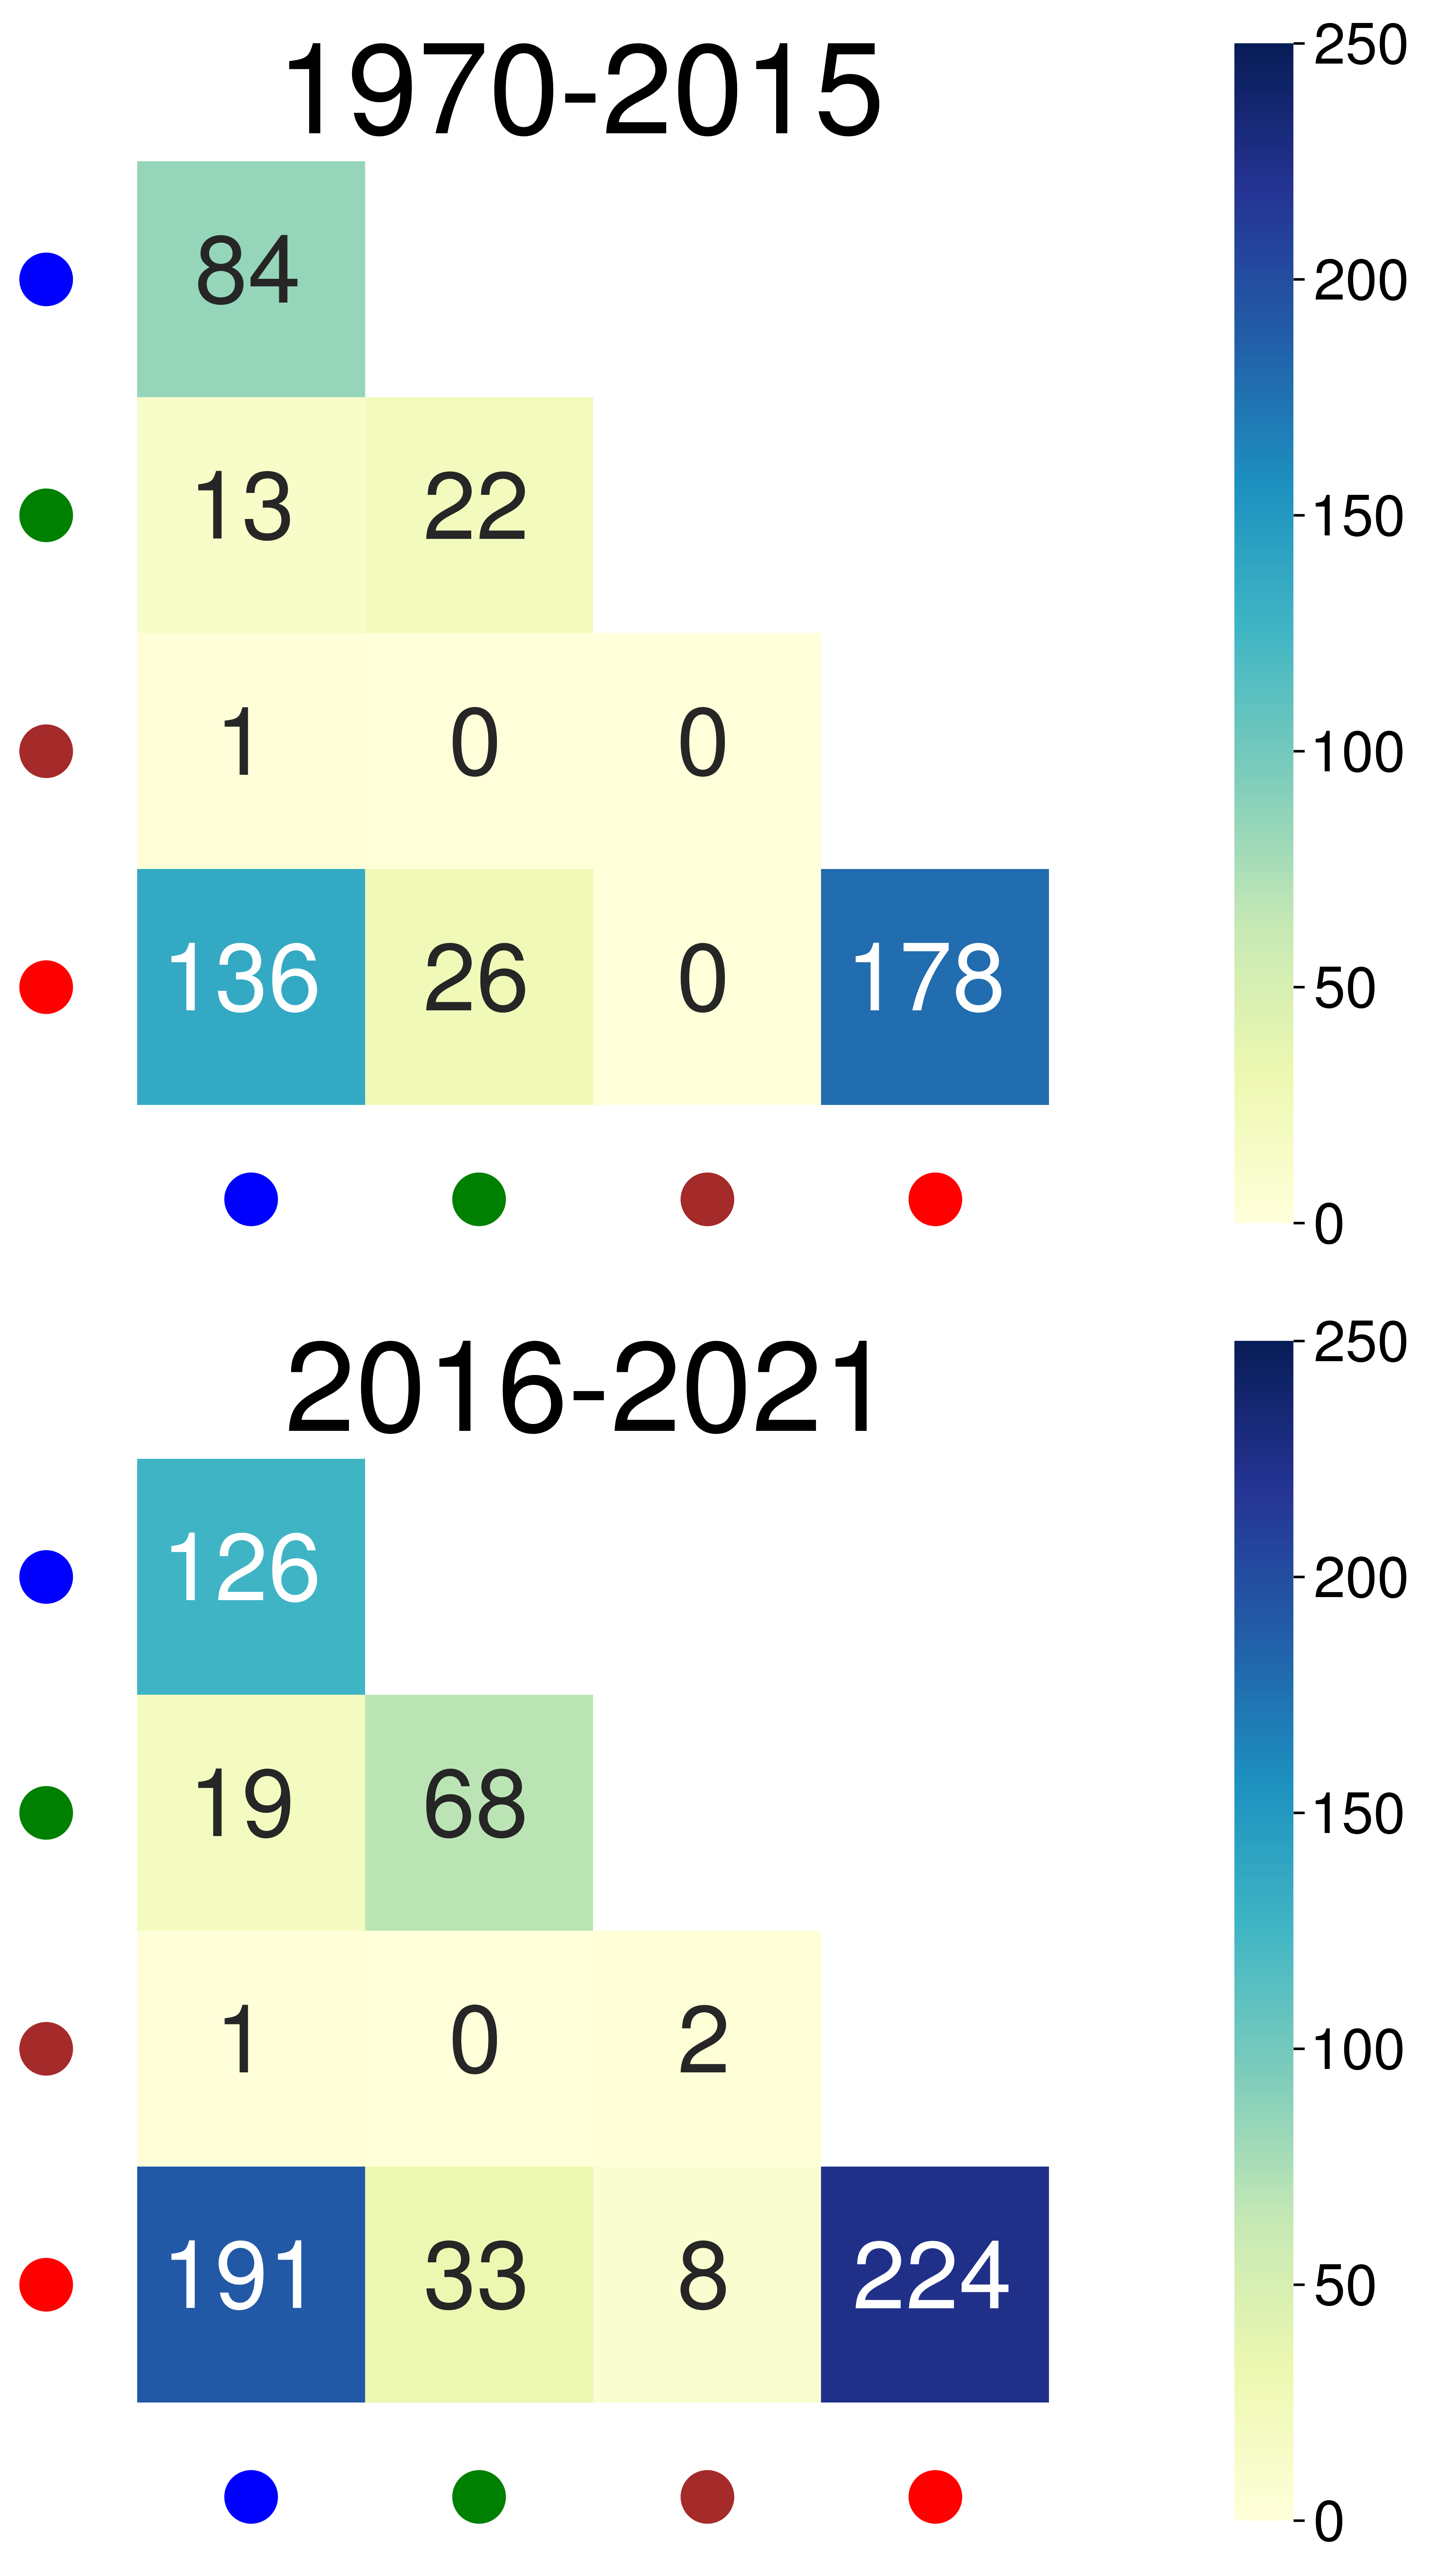

In [114]:
# プロット作成
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# 対角線より上の要素を NaN にする
mask = np.triu(np.ones_like(df_mix, dtype=bool), k=1)  # k=1 で対角線を含めない
df_mix = df_mix.astype(float)  # NaN を入れるため float に変換
df_mix[mask] = np.nan

# 対角線より上の要素を NaN にする
mask = np.triu(np.ones_like(df_mix1, dtype=bool), k=1)  # k=1 で対角線を含めない
df_mix1 = df_mix1.astype(float)  # NaN を入れるため float に変換
df_mix1[mask] = np.nan


roles = ['guideline development group', 'systematic review team', 'external methodologists', 'external review group']


# 6. ヒートマップの描画
sns.heatmap(df_mix,
            ax=ax1,  
            annot=True, 
            fmt="g", 
            cmap="YlGnBu",
            annot_kws={"size": 30},         # セル内文字のサイズを16に設定
            vmin=0, vmax=250,               # カラーバーの範囲を0～100に指定
            cbar_kws={'ticks': [0, 50, 100, 150, 200,250]}  # カラーバーの目盛り位置を指定
           )

cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # ここでフォントサイズを変更（例: 18ポイント）
# mathtext を使って、色付きの丸を定義
# 軸のラベルを消す（デフォルトのラベルを非表示）
ax1.set_xticklabels([""] * 4)
ax1.set_yticklabels([""] * 4)

# 軸の位置を取得（各セルの中心にマーカーを配置）
xticks = np.arange(4) + 0.5  # x 軸のラベル位置
yticks = np.arange(4) + 0.5  # y 軸のラベル位置

# ラベルに表示する丸の色（4×4に対応）
colors = ["blue", "green", "brown", "red"]  # 4つのラベル用

# x 軸の丸を描画
for x, color in zip(xticks, colors):
    ax1.scatter(x, 4.4, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# y 軸の丸を描画
for y, color in zip(yticks, colors):
    ax1.scatter(-0.4, y, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# **軸の線（スパイン）を削除**
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# 軸の目盛り線（グリッド線）が被らないように削除
ax1.tick_params(left=False, bottom=False)

# 軸の範囲を調整（丸が見切れないように）
ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(4.5, -0.5)

ax1.text(0.5, 1.0, '1970-2015', va='top', ha='center', transform=ax1.transAxes, fontsize=40, fontweight='bold')




# 6. ヒートマップの描画
sns.heatmap(df_mix1,
            ax=ax2,  
            annot=True, 
            fmt="g", 
            cmap="YlGnBu",
            annot_kws={"size": 30},         # セル内文字のサイズを16に設定
            vmin=0, vmax=250,               # カラーバーの範囲を0～100に指定
            cbar_kws={'ticks': [0, 50, 100, 150, 200,250]}  # カラーバーの目盛り位置を指定
           )

cbar = ax2.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # ここでフォントサイズを変更（例: 18ポイント）
# mathtext を使って、色付きの丸を定義
# 軸のラベルを消す（デフォルトのラベルを非表示）
ax2.set_xticklabels([""] * 4)
ax2.set_yticklabels([""] * 4)

# 軸の位置を取得（各セルの中心にマーカーを配置）
xticks = np.arange(4) + 0.5  # x 軸のラベル位置
yticks = np.arange(4) + 0.5  # y 軸のラベル位置

# ラベルに表示する丸の色（4×4に対応）
colors = ["blue", "green", "brown", "red"]  # 4つのラベル用

# x 軸の丸を描画
for x, color in zip(xticks, colors):
    ax2.scatter(x, 4.4, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# y 軸の丸を描画
for y, color in zip(yticks, colors):
    ax2.scatter(-0.4, y, color=color, s=250, marker="o", clip_on=False)  # s はサイズ

# **軸の線（スパイン）を削除**
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

# 軸の目盛り線（グリッド線）が被らないように削除
ax2.tick_params(left=False, bottom=False)

# 軸の範囲を調整（丸が見切れないように）
ax2.set_xlim(-0.5, 4.5)
ax2.set_ylim(4.5, -0.5)

ax2.text(0.5, 1.0, '2016-2021', va='top', ha='center', transform=ax2.transAxes, fontsize=40, fontweight='bold')


### この二つに有意差があるか (Fig2e)

In [36]:
import networkx as nx
import random

def difference_in_assortativity_test_common(G_before, G_after, attribute='role', n_permutations=1000, seed=None):
    """
    G_beforeとG_afterで共通のノードのみを対象として、
    属性(attribute)に基づくアソート性の差 (r_after - r_before) が
    統計的に有意かどうかをPermutation Testで検証する関数。
    
    前提：
    - G_before, G_after は異なるノード集合を持つ可能性があるが、
      共通ノードのみで比較する。
    
    引数：
    - G_before: ガイドライン前のネットワーク
    - G_after:  ガイドライン後のネットワーク
    - attribute: ノード属性のキー (デフォルト 'role')
    - n_permutations: ランダム化テストの繰り返し回数
    - seed: 乱数シード（再現性のため任意で指定）
    
    戻り値：
    - diff_obs: 実際のネットワークで観測されたアソート性の差 (r_after - r_before)
    - p_value:  差の絶対値がランダムに得られる確率（両側検定）
    """
    if seed is not None:
        random.seed(seed)
    
    # 両ネットワークに共通するノードのみを抽出
    common_nodes = list(set(G_before.nodes()).intersection(set(G_after.nodes())))
    if not common_nodes:
        raise ValueError("共通ノードが存在しません。")
    
    # 両グラフから共通ノードのみのサブグラフを作成
    G_before_sub = G_before.subgraph(common_nodes).copy()
    G_after_sub  = G_after.subgraph(common_nodes).copy()
    
    # 元の役職を保存
    original_roles = {node: G_before_sub.nodes[node][attribute] for node in common_nodes}

    # 観測されたアソート性を計算
    r_before_obs = nx.attribute_assortativity_coefficient(G_before_sub, attribute)
    r_after_obs  = nx.attribute_assortativity_coefficient(G_after_sub, attribute)
    diff_obs = r_after_obs - r_before_obs

    # ラベルのリストを作成
    roles_list = list(original_roles.values())

    count = 0  # 差の絶対値が観測値以上になる回数

    for _ in range(n_permutations):
        random.shuffle(roles_list)
        # シャッフルしたラベルを両方のサブグラフに割り当てる
        for i, node in enumerate(common_nodes):
            G_before_sub.nodes[node][attribute] = roles_list[i]
            G_after_sub.nodes[node][attribute] = roles_list[i]
        
        # アソート性を再計算
        r_before_perm = nx.attribute_assortativity_coefficient(G_before_sub, attribute)
        r_after_perm  = nx.attribute_assortativity_coefficient(G_after_sub, attribute)
        diff_perm = r_after_perm - r_before_perm
        
        if abs(diff_perm) >= abs(diff_obs):
            count += 1

    # 元の役職に戻す
    for node in common_nodes:
        G_before_sub.nodes[node][attribute] = original_roles[node]
        G_after_sub.nodes[node][attribute] = original_roles[node]

    p_value = (count + 1) / (n_permutations + 1)
    return diff_obs, p_value

# サンプル実行例
if __name__ == "__main__":
    # サンプルとして、G_beforeは102ノード、G_afterは104ノードのグラフを作成
    # ここでは、単純なErdős–Rényiグラフで例示（実際は異なるグラフデータを使用してください）
    G_before = G1
    G_after  = G
    
    # 同じノード集合を前提としてノード属性 'role' をランダムに割り当てる
    roles = ['guideline development group', 'systematic review team', 'external methodologists', 'external review group']
    #for node in G_before.nodes():
    #    G_before.nodes[node]['role'] = random.choice(roles)
    #for node in G_after.nodes():
    #    G_after.nodes[node]['role'] = G_before.nodes[node]['role']  # 同じ役職にしておく

    
    # 共通ノードのみのサブグラフでアソート性を計算
    r_before_sub = nx.attribute_assortativity_coefficient(G_before.subgraph(set(G_before.nodes()).intersection(set(G_after.nodes()))), 'role')
    r_after_sub  = nx.attribute_assortativity_coefficient(G_after.subgraph(set(G_before.nodes()).intersection(set(G_after.nodes()))), 'role')
    print(f"Assortativity (Before, common nodes): {r_before_sub:.3f}")
    print(f"Assortativity (After, common nodes) : {r_after_sub:.3f}")
    
    diff_obs, p_val = difference_in_assortativity_test_common(G_before, G_after,
                                                              attribute='role',
                                                              n_permutations=1000,
                                                              seed=123)
    print(f"Observed difference (r_after - r_before) = {diff_obs:.3f}")
    print(f"p-value = {p_val:.3f}")


Assortativity (Before, common nodes): 0.041
Assortativity (After, common nodes) : 0.102
Observed difference (r_after - r_before) = 0.061
p-value = 0.069
